In [115]:
import pandas as pd

In [116]:
# Load up code_mcts/outputs/mcts_rewards_beta_with_intermediate_rewards_32rollout.jsonl
dataframe = pd.read_json('code_mcts/outputs/mcts_rewards_beta_with_intermediate_rewards_64rollout.jsonl', lines=True)
dataframe.columns

Index(['task_id', 'completion', 'reward', 'rollout_count'], dtype='object')

In [117]:
# Whenever rollout count = -1, set it to 32
dataframe['rollout_count'] = dataframe['rollout_count'].apply(lambda x: 64 if x == -1 else x)

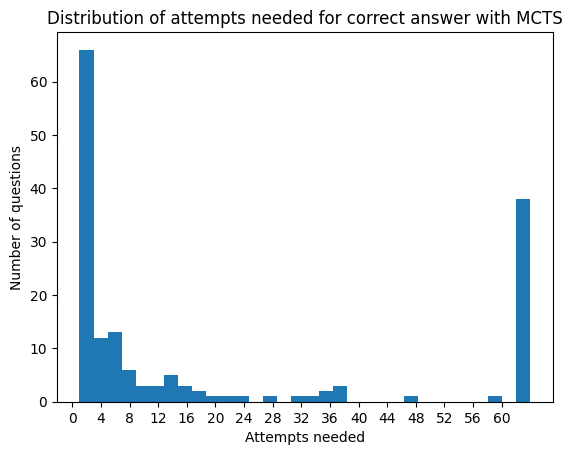

In [118]:
# Draw the distribution for rollout_count
import matplotlib.pyplot as plt

plt.hist(dataframe['rollout_count'], bins=32)
plt.xticks(range(0, 64, 4))
plt.title('Distribution of attempts needed for correct answer with MCTS')
plt.xlabel('Attempts needed')
plt.ylabel('Number of questions')
plt.show()

In [119]:
# Load code_mcts/outputs/samples_llama_32.jsonl
random_sample_dataframe = pd.read_json('code_mcts/outputs/samples_llama_64.jsonl', lines=True)
random_sample_dataframe.columns

Index(['task_id', 'completion', 'reward', 'rollout_count'], dtype='object')

In [120]:
# Group the dataset by task_id, and count the number of samples for each task_id as 'rollout_count'
random_sample_dataframe = random_sample_dataframe.groupby('task_id').size().reset_index(name='rollout_count')
random_sample_dataframe

,task_id,rollout_count
0,HumanEval/0,2
1,HumanEval/1,53
2,HumanEval/10,1
3,HumanEval/100,64
4,HumanEval/101,64
...,...,...
159,HumanEval/95,9
160,HumanEval/96,8
161,HumanEval/97,3
162,HumanEval/98,4


Text(0, 0.5, 'Number of questions')

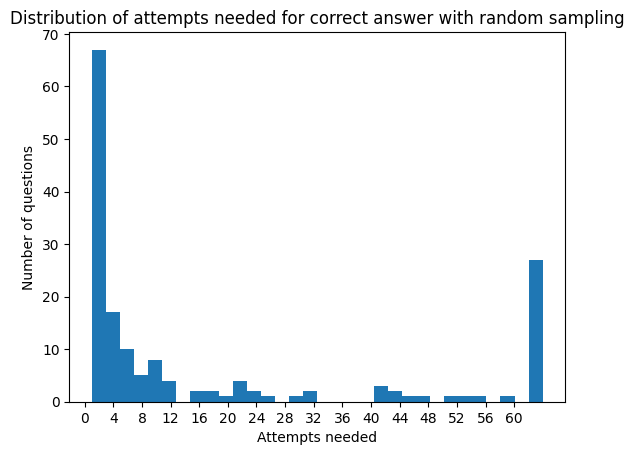

In [121]:
# Plot the distribution of rollout_count for random sampling
plt.hist(random_sample_dataframe['rollout_count'], bins=32)
plt.xticks(range(0, 64, 4))
plt.title('Distribution of attempts needed for correct answer with random sampling')
plt.xlabel('Attempts needed')
plt.ylabel('Number of questions')

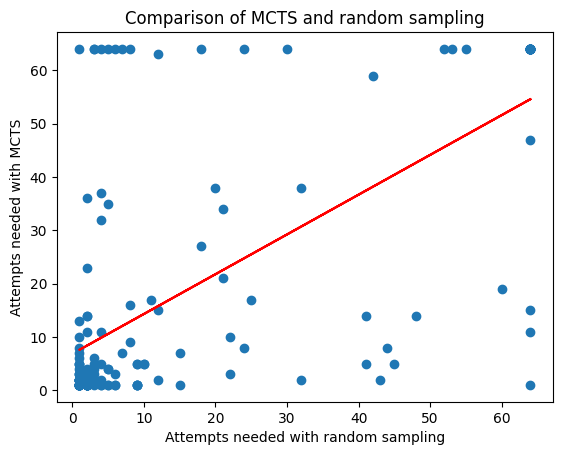

In [122]:
# For every row in dataframe and random_sample_dataframe, calculate the difference in rollout_count
diff = dataframe.merge(random_sample_dataframe, on='task_id', suffixes=('_mcts', '_random'))
# For each question on the x-axis, plot both the MCTS and random sampling rollout_count
plt.scatter(diff['rollout_count_random'], diff['rollout_count_mcts'])
plt.xlabel('Attempts needed with random sampling')
plt.ylabel('Attempts needed with MCTS')
plt.title('Comparison of MCTS and random sampling')
# Draw the line of best fit
import numpy as np
m, b = np.polyfit(diff['rollout_count_random'], diff['rollout_count_mcts'], 1)
plt.plot(diff['rollout_count_random'], m*diff['rollout_count_random'] + b, color='red')
plt.show()

In [123]:
# On average, for every 10 attempts at random, how many attempts does MCTS need?
diff['rollout_count_mcts'].mean() / diff['rollout_count_random'].mean()
print(f"On average, for every 10 attempts at random, MCTS needs {diff['rollout_count_mcts'].mean() / diff['rollout_count_random'].mean() * 8} attempts")

On average, for every 10 attempts at random, MCTS needs 9.004739336492891 attempts


In [124]:
# How many instances where random sampling found a solution (count < 64) but MCTS did not (count = 64)?
instances_where_random_solved = diff[diff['rollout_count_random'] < 64]
instances_where_random_solved_but_mcts_did_not = instances_where_random_solved[instances_where_random_solved['rollout_count_mcts'] == 64]
instances_where_random_solved_but_mcts_did_not

,task_id,completion,reward,rollout_count_mcts,rollout_count_random
1,HumanEval/1,,0,64,53
41,HumanEval/41,,0,64,52
49,HumanEval/49,,0,64,1
65,HumanEval/65,,0,64,5
77,HumanEval/77,,0,64,55
90,HumanEval/90,,0,64,3
91,HumanEval/91,,0,64,3
93,HumanEval/93,,0,64,24
94,HumanEval/94,,0,64,4
96,HumanEval/96,,0,64,8


In [125]:
# How many instances where MCTS found a solution (count < 64) but random sampling did not (count = 64)?
instances_where_mcts_solved = diff[diff['rollout_count_mcts'] < 64]
instances_where_mcts_solved_but_random_did_not = instances_where_mcts_solved[instances_where_mcts_solved['rollout_count_random'] == 64]
instances_where_mcts_solved_but_random_did_not

,task_id,completion,reward,rollout_count_mcts,rollout_count_random
19,HumanEval/19,from typing import List\n\n\ndef sort_numbers(...,1,47,64
32,HumanEval/32,"import math\n\n\ndef poly(xs: list, x: float):...",1,15,64
39,HumanEval/39,"\n\ndef prime_fib(n: int):\n """"""\n prime...",1,11,64
75,HumanEval/75,"\ndef is_multiply_prime(a):\n """"""Write a fu...",1,1,64
